In [ ]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Run Code

In [ ]:
#Load the dataset
from google.colab import files
uploaded = files.upload()
df=pd.read_csv('WSN-DS - Blackhole.csv')
df.head(8000)

Saving WSN-DS - Blackhole.csv to WSN-DS - Blackhole (1).csv


,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Consumed Energy,Attack type
0,102041,103,1,102041,0,1,3,0,93,1,0,0,0,1302,0,0,0,0.00726,Blackhole
1,103003,153,1,103003,0,1,1,0,72,1,0,0,0,1296,0,0,0,0.00745,Blackhole
2,108078,403,1,108078,0,1,3,0,73,1,0,0,0,1314,0,0,0,0.00725,Blackhole
3,111029,553,1,111029,0,1,5,0,36,1,0,0,0,1260,0,0,0,0.00722,Blackhole
4,112040,603,1,112040,0,1,5,0,48,1,0,0,0,1296,0,0,0,0.00726,Blackhole
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,606046,2553,1,606100,0,1,26,0,0,0,0,0,0,0,0,0,0,0.00450,Blackhole
7996,606051,2553,1,606100,0,1,26,0,0,0,0,0,0,0,0,0,0,0.00449,Blackhole
7997,606054,2553,1,606100,0,1,26,0,0,0,0,0,0,0,0,0,0,0.00450,Blackhole
7998,606056,2553,1,606100,0,1,26,0,0,0,0,0,0,0,0,0,0,0.00450,Blackhole


In [ ]:
#Find number of rows and columns
df.shape

(8039, 19)

In [ ]:
#count the number of empty values in each colum
df.isna().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Consumed Energy     0
Attack type         0
dtype: int64

In [ ]:
#leave columns with missing values
df=df.dropna(axis=1)

In [ ]:
#Remaining rows and columns
df.shape

(8039, 19)

In [ ]:
#Find number of Malignant and Bening in the data
df['Attack type'].value_counts()

Blackhole    8039
Name: Attack type, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


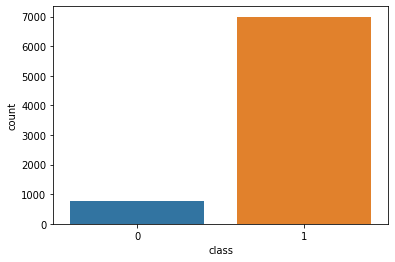

In [ ]:
#Plot the count
sns.countplot(df['class'],label='count')

In [ ]:
#look at the data types
df.dtypes

 id                   int64
 Time                 int64
 Is_CH                int64
 who CH               int64
 Dist_To_CH           int64
 ADV_S                int64
 ADV_R                int64
 JOIN_S               int64
 JOIN_R               int64
 SCH_S                int64
 SCH_R                int64
Rank                  int64
 DATA_S               int64
 DATA_R               int64
 Data_Sent_To_BS      int64
 dist_CH_To_BS        int64
 send_code            int64
Consumed Energy     float64
Attack type          object
dtype: object

In [ ]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)

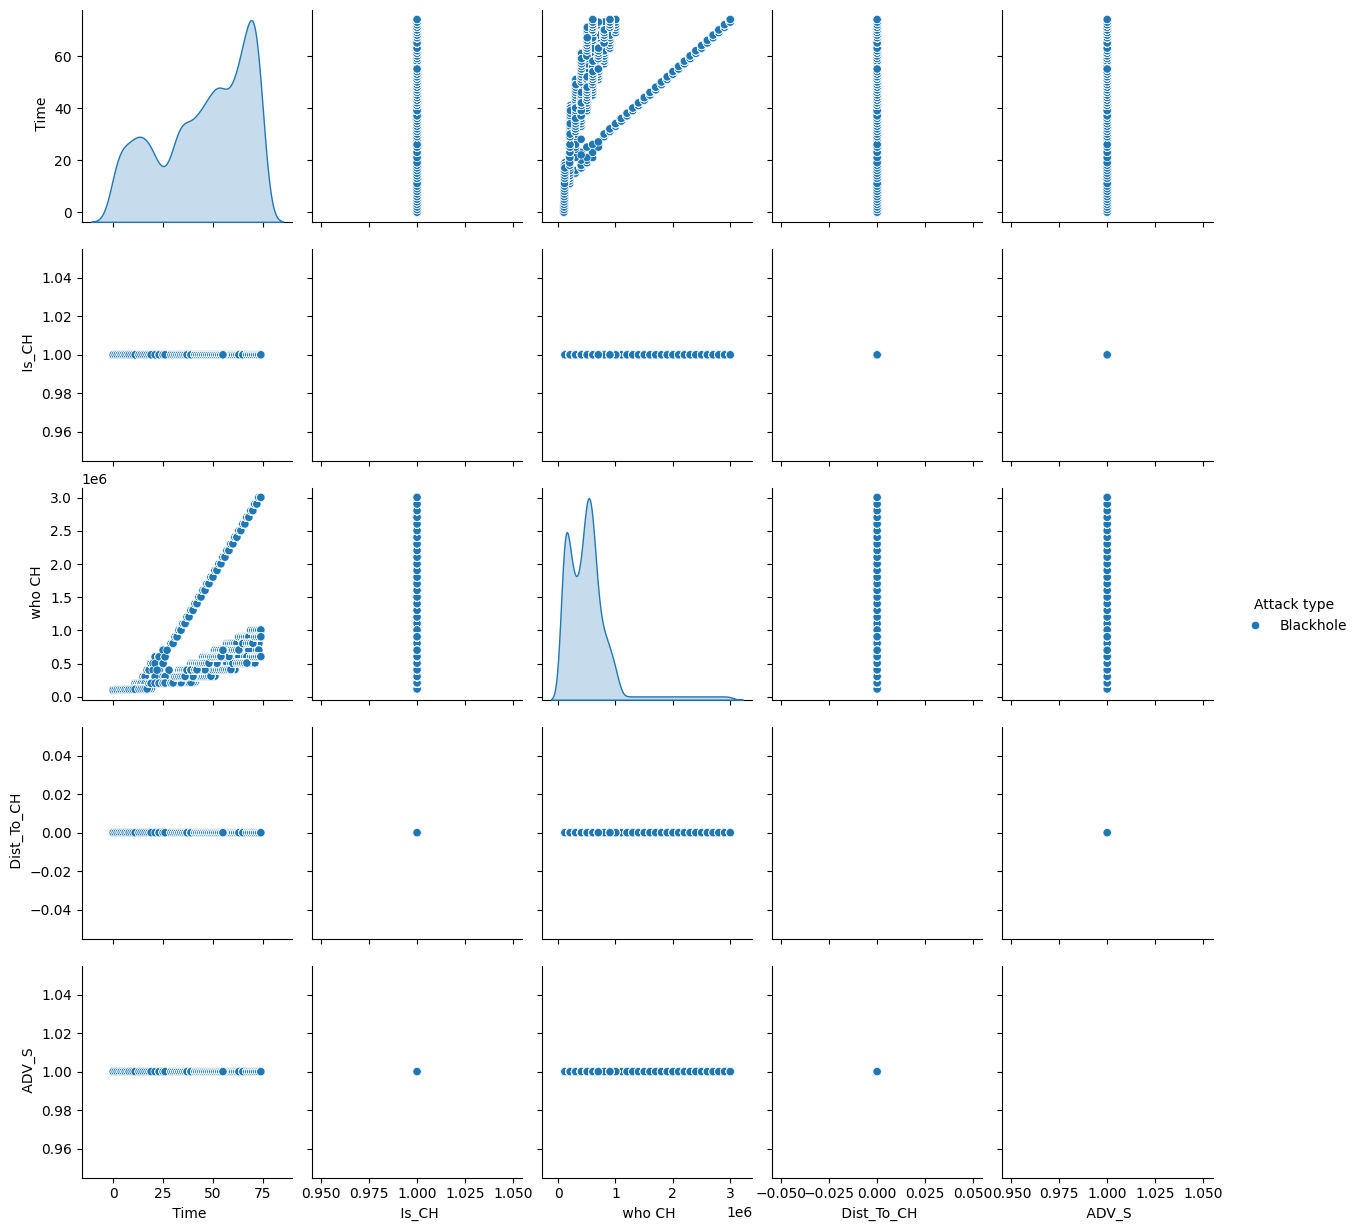

In [ ]:
#create a pair plot
sns.pairplot(df, vars= df.iloc[:,1:6],hue='Attack type')

In [ ]:
#split the dataset to Features (X) and Class (Y)
X=df.iloc[:,0:17].values
Y=df.iloc[:,17].values

#Training & Testing

In [ ]:
#Split the data into 80% Training and 20% Testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [ ]:
#scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import functools
import csv
import random

In [ ]:
data=[]
def Deep_belief_network(X,*args):
  x,y,regularization_nn,learning_rate_RBM,learning_rate_nn,n_iter_RBM,batch_size_RBM,batch_size_nn,n_iter_nn=args
  n_components_RBM,n_components_nn_=X
  n_components_RBM = int(n_components_RBM)
  n_components_nn_ = int(n_components_nn_)
  rbm_model_1=BernoulliRBM(n_components=n_components_RBM,n_iter=n_iter_RBM,learning_rate=learning_rate_RBM,batch_size=batch_size_RBM,verbose=0)
  X_train, X_test, Y_train, Y_test = train_test_split(x,y ,test_size=0.1, random_state=0)

  min_max_scaler = MinMaxScaler()
  X_train = min_max_scaler.fit_transform(X_train)
  rbm_train=rbm_model_1.fit_transform(X_train )
  nn_model=MLPClassifier(activation='relu', solver='sgd', alpha=regularization_nn,
      batch_size=batch_size_nn, hidden_layer_sizes=(n_components_nn_), learning_rate='constant',
      learning_rate_init=learning_rate_nn, max_iter=n_iter_nn,shuffle=True, validation_fraction=0.1, verbose=False,random_state=1)
  nn_model.fit(rbm_train,Y_train)
  X_test=min_max_scaler.fit_transform(X_test)
  X_test=rbm_model_1.transform(X_test)
  Y_pred=nn_model.predict(X_test)
  acc=accuracy_score(Y_test,Y_pred)
  f= open('data.txt', 'a')
  f.write(str(n_components_RBM)+' '+str(n_components_nn_)+' '+str(acc)+'\n')
  f.close()

  return acc

In [ ]:
from __future__ import division
import time
import random
import numpy
import math
from sklearn.linear_model import LogisticRegression

class CHOA():
    def __init__(self,regularization_nn,learning_rate_RBM,learning_rate_nn,n_iter_RBM,batch_size_RBM,batch_size_nn,n_iter_nn):
        self.learning_rate_RBM=0.006
        self.learning_rate_nn=0.1
        self.n_iter_RBM=20
        self.batch_size_RBM=100
        self.batch_size_nn=100
        self.n_iter_nn=5000
        self.PopSize=int(batch_size_RBM)
        self.dim=n_iter_RBM
        self.acc_err=batch_size_nn
        self.lb=learning_rate_RBM
        self.ub=learning_rate_nn
        self.objf=regularization_nn
        self.pos=numpy.zeros((int(batch_size_RBM),int(n_iter_RBM)))
        self.fun_val = numpy.zeros((int(batch_size_RBM)))
        self.fitness = numpy.zeros(int(batch_size_RBM))
        self.gpoint = numpy.zeros((int(batch_size_RBM),2))
        self.prob=numpy.zeros(int(batch_size_RBM))
        self.LocalLimit=n_iter_RBM*batch_size_RBM;
        self.GlobalLimit=batch_size_RBM;
        self.fit = numpy.zeros(int(batch_size_RBM))
        self.MinCost=numpy.zeros(int(n_iter_nn))
        self.Bestpos=numpy.zeros(int(n_iter_RBM))
        self.group = 0
        self.func_eval=0
        self.part=1
        self.max_part=5
        self.cr=0.1

        #self.args=X,Y,regularization_nn,learning_rate_RBM,learning_rate_nn,n_iter_RBM,batch_size_RBM,batch_size_nn,n_iter_nn

    # ====== Function: CalculateFitness() ========= #
    def CalculateFitness(self,fun1):
      if fun1 >= 0:
        result = (1/(fun1+1))
      else:
        result=(1+math.fabs(fun1))
      return result
    #================ X X X ===================== #

    # ==================================== Function: Initialization() ============================================ #
    def initialize(self):
        global GlobalMin, GlobalLeaderPosition, GlobalLimitCount, LocalMin, LocalLimitCount, LocalLeaderPosition
        S_max=int(self.PopSize/2)
        LocalMin = numpy.zeros(S_max)
        LocalLeaderPosition=numpy.zeros((int(S_max),int(self.dim)))
        LocalLimitCount=numpy.zeros(S_max)
        for i in range(self.PopSize):
            for j in range(self.dim):
                if type(self.ub)==int:
                    self.pos[i,j]=random.random()*(self.ub-self.lb)+self.lb
                else:
                    self.pos[i,j]=random.random()*(self.ub[j]-self.lb[j])+self.lb[j]
        #Calculate objective function for each particle
        for i in range(self.PopSize):
            # Performing the bound checking
            self.pos[i,:]=numpy.clip(self.pos[i,:], self.lb, self.ub)
            self.fun_val[i]=self.objf(self.pos[i,:])
            self.func_eval+=1
            self.fitness[i]=self.CalculateFitness(self.fun_val[i])

        # Initialize Global Leader Learning
        GlobalMin=self.fun_val[0]
        GlobalLeaderPosition=self.pos[0,:]
        GlobalLimitCount=0

        # Initialize Local Leader Learning
        for k in range(self.group):
            LocalMin[k]=self.fun_val[int(self.gpoint[k,0])]
            LocalLimitCount[k]=0
            LocalLeaderPosition[k,:]=self.pos[int(self.gpoint[k,0]),:]
    # ============================================ X X X ======================================================= #


    # =========== Function: CalculateProbabilities() ============ #
    def CalculateProbabilities(self):
        maxfit=self.fitness[0];
        i=1
        while(i<self.PopSize):
            if (self.fitness[i]>maxfit):
                maxfit=self.fitness[i];
            i+=1
        for i in range(self.PopSize):
            self.prob[i]=(0.9*(self.fitness[i]/maxfit))+0.1;
    # ========================== X X X ======================== #

    # ================= Function: create_group() ================ #
    def create_group(self):
        g=0
        lo=0
        while(lo < self.PopSize):
            hi= lo+int(self.PopSize/self.part)
            self.gpoint[g,0]=lo
            self.gpoint[g,1]=hi
            if((self.PopSize-hi)<(int(self.PopSize/self.part))):
                self.gpoint[g,1]=(self.PopSize-1)
            g=g+1
            lo=hi+1
        self.group = g
    # ========================== X X X ======================== #

    # ================= Function: LocalLearning() ================ #
    def LocalLearning(self):
        global LocalMin, LocalLimitCount, LocalLeaderPosition
        S_max=int(self.PopSize/2)
        OldMin = numpy.zeros(S_max)
        for k in range(self.group):
            OldMin[k]=LocalMin[k]

        for  k in range(self.group):
            i=int(self.gpoint[k,0])
            while (i<=int(self.gpoint[k,1])):
                if (self.fun_val[i]<LocalMin[k]):
                    LocalMin[k]=self.fun_val[i]
                    LocalLeaderPosition[k,:]=self.pos[i,:]
                i=i+1

        for k in range(self.group):
            if (math.fabs(OldMin[k]-LocalMin[k])<self.acc_err):
                LocalLimitCount[k]=LocalLimitCount[k]+1
            else:
                LocalLimitCount[k]=0
    # ========================== X X X ======================== #

    # ================= Function: GlobalLearning() ================ #
    def GlobalLearning(self):
        global GlobalMin, GlobalLeaderPosition, GlobalLimitCount
        G_trial=GlobalMin
        for i in range(self.PopSize):
            if (self.fun_val[i] < GlobalMin):
                GlobalMin=self.fun_val[i]
                GlobalLeaderPosition=self.pos[i,:]

        if(math.fabs(G_trial-GlobalMin)<self.acc_err):
            GlobalLimitCount=GlobalLimitCount+1
        else:
            GlobalLimitCount=0
    # ========================== X X X ======================== #

    # ================= Function: LocalLeaderPhase() ================ #
    def LocalLeaderPhase(self,k):
        global LocalLeaderPosition
        new_position=numpy.zeros((1,self.dim))
        lo=int(self.gpoint[k,0])
        hi=int(self.gpoint[k,1])
        i=lo
        while(i <=hi):
            while True:
                PopRand=int((random.random()*(hi-lo)+lo))
                if (PopRand != i):
                    break
            for j in range(self.dim):
                if (random.random() >= self.cr):
                    new_position[0,j]=self.pos[i,j]+(LocalLeaderPosition[k,j]-self.pos[i,j])*(random.random())+(self.pos[PopRand,j]-self.pos[i,j])*(random.random()-0.5)*2
                else:
                    new_position[0,j]=self.pos[i,j]
            new_position=numpy.clip(new_position, self.lb, self.ub)

            ObjValSol=self.objf(new_position)
            self.func_eval+=1
            FitnessSol=self.CalculateFitness(ObjValSol)
            if (FitnessSol>self.fitness[i]):
                self.pos[i,:]=new_position
                self.fun_val[i]=ObjValSol
                self.fitness[i]=FitnessSol
            i+=1
    # ========================== X X X ======================== #

    # ================= Function: GlobalLeaderPhase() ================ #
    def GlobalLeaderPhase(self,k):
        global GlobalLeaderPosition
        new_position=numpy.zeros((1,self.dim))
        lo=int(self.gpoint[k,0])
        hi=int(self.gpoint[k,1])
        i=lo;
        l=lo;
        while(l<hi):
            if (random.random() < self.prob[i]):
                l+=1
                while True:
                    PopRand=int(random.random()*(hi-lo)+lo)
                    if (PopRand != i):
                        break
                param2change=int(random.random()*self.dim)
                new_position=self.pos[i,:]
                new_position[param2change]=self.pos[i,param2change]+(GlobalLeaderPosition[param2change]-self.pos[i,param2change])*(random.random())+(self.pos[PopRand,param2change]-self.pos[i,param2change])*(random.random()-0.5)*2
                new_position=numpy.clip(new_position, self.lb, self.ub)
                ObjValSol=self.objf(new_position)
                self.func_eval+=1
                FitnessSol=self.CalculateFitness(ObjValSol)
                if (FitnessSol>self.fitness[i]):
                    self.pos[i,:]=new_position
                    self.fun_val[i]=ObjValSol
                    self.fitness[i]=FitnessSol
            i+=1;
            if (i==(hi)):
                i=lo;
    # ========================== X X X ======================== #

    # ================= Function: GlobalLeaderDecision() ================ #
    def GlobalLeaderDecision(self):
        global GlobalLimitCount
        if(GlobalLimitCount> self.GlobalLimit):
            GlobalLimitCount=0
            if(self.part<self.max_part):
                self.part=self.part+1
                self.create_group()
                self.LocalLearning()
            else:
                self.part=1
                self.create_group()
                self.LocalLearning()
    # ========================== X X X ======================== #

    # ================= Function: LocalLeaderDecision() ================ #
    def LocalLeaderDecision(self):
        global GlobalLeaderPosition, LocalLimitCount, LocalLeaderPosition
        for k in range(self.group):
            if(LocalLimitCount[k]>self.LocalLimit):
                i=self.gpoint[k,0]
                while(i<=int(self.gpoint[k,1])):
                    for j in range(self.dim):
                        if (random.random()>= self.cr):
                            if type(self.ub)==int:
                                self.pos[i,j]=random.random()*(self.ub-self.lb)+self.lb
                            else:
                                self.pos[i,j]=random.random()*(self.ub[j]-self.lb[j])+self.lb[j]
                        else:
                            self.pos[i,j]=self.pos[i,j]+(GlobalLeaderPosition[j]-self.pos[i,j])*random.random()+(self.pos[i,j]-LocalLeaderPosition[k,j])*random.random()
                    self.pos[i,:]=numpy.clip(self.pos[i,:], self.lb, self.ub)
                    self.fun_val[i]=self.objf(self.pos[i,:])
                    self.func_eval+=1
                    self.fitness[i]=self.CalculateFitness(self.fun_val[i])
                    i+=1
                LocalLimitCount[k]=0
    # ========================== X X X ======================== #

#Normalized value to be added in each metrices
Normalized_value =0.232985

# =================== model_LogisticRegression() =================== #

def model_LogisticRegression(X_train,Y_train):
    #Logistic regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(X_train+Normalized_value,Y_train)
    return log

# ========================== X X X ======================== #

# =================== model_DecisionTreeClassifier() =================== #

def model_DecisionTreeClassifier(X_train,Y_train):
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train+Normalized_value,Y_train)
    return tree

# ========================== X X X ======================== #

# =================== model_RandomForestClassifier() =================== #

def model_RandomForestClassifier(X_train,Y_train):
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(X_train+Normalized_value,Y_train)
    return forest

# ========================== X X X ======================== #


# =================== chimp_optimizer() =================== #

def chimp_optimizer(X_train,Y_train):
    chimp_classifier=LogisticRegression(random_state=0)
    chimp_classifier.fit(X_train,Y_train)
    return chimp_classifier

# ========================== X X X ======================== #


# ==================================== Main() ===================================== #
def main(regularization_nn,learning_rate_RBM,learning_rate_nn,n_iter_RBM,batch_size_RBM,n_iter_nn,batch_size_nn,obj_val,succ_rate,mean_feval):
  choa=CHOA(regularization_nn,learning_rate_RBM,learning_rate_nn,n_iter_RBM,batch_size_RBM,batch_size_nn,n_iter_nn)
  s=solution()
  #print("CHOA is optimizing  \""+choa.objf.__name__+"\"")
  #timerStart=time.time()
  #s.startTime=time.strftime("%Y-%m-%d-%H-%M-%S")

  # =========================== Calling: initialize() =========================== #
  choa.initialize()

  # ========================== Calling: GlobalLearning() ======================== #
  choa.GlobalLearning()

  # ========================= Calling: LocalLearning() ========================== #
  choa.LocalLearning()

  # ========================== Calling: create_group() ========================== #
  choa.create_group()

  # ================================= Looping ================================== #
  for l in range(iters):
      for k in range(choa.group):
          # ==================== Calling: LocalLeaderPhase() =================== #
          choa.LocalLeaderPhase(k)

      # =================== Calling: CalculateProbabilities() ================== #
      choa.CalculateProbabilities()

      for k in range(choa.group):
          # ==================== Calling: GlobalLeaderPhase() ================== #
          choa.GlobalLeaderPhase(k)

      # ======================= Calling: GlobalLearning() ====================== #
      choa.GlobalLearning()

      # ======================= Calling: LocalLearning() ======================= #
      choa.LocalLearning()

      # ================== Calling: LocalLeaderDecision() ====================== #
      choa.LocalLeaderDecision()

      # ===================== Calling: GlobalLeaderDecision() ================== #
      choa.GlobalLeaderDecision()

      # ======================= Updating: 'cr' parameter ======================= #
      choa.cr = choa.cr + (0.4/iters)

      # ====================== Saving the best individual ====================== #
      choa.MinCost[l] = GlobalMin
      Bestpos=choa.pos[1,:]
      gBestScore=GlobalMin


      # ================ Displaying the fitness of each iteration ============== #
      if (l%1==0):
            print(['At iteration '+ str(l+1)+ ' the best fitness is '+ str(gBestScore)]);

      # ====================== Checking: acc_error ============================ #
      if(math.fabs(GlobalMin-obj_val)<=choa.acc_err):
          succ_rate+=1
          mean_feval=mean_feval+choa.func_eval
          break
  # ========================= XXX Ending of Loop XXX ========================== #

  # =========================== XX Result saving XX =========================== #
  error1=math.fabs(GlobalMin-obj_val)
  timerEnd=time.time()
  s.endTime=time.strftime("%Y-%m-%d-%H-%M-%S")
  s.executionTime=timerEnd-timerStart
  s.convergence=choa.MinCost
  s.optimizer="CHOA"
  s.error = error1
  s.feval=choa.func_eval
  s.objfname=choa.objf.__name__

  return s, succ_rate,mean_feval

  # ================================ X X X =================================== #

class solution:
  def __init__(self):
      self.best = 0
      self.bestIndividual=[]
      self.convergence = []
      self.optimizer=""
      self.objfname=""
      self.startTime=0
      self.endTime=0
      self.executionTime=0
      self.lb=0
      self.ub=0
      self.dim=0
      self.popnum=0
      self.error =0
      self.feval=0
      self.maxiers=0


In [ ]:
#create the function for the models
def models(X_train,Y_train):

    #Logistic regression
    log  = model_LogisticRegression(X_train,Y_train)

    #Decision Tree
    tree  = model_DecisionTreeClassifier(X_train,Y_train)

    #Random Forest
    forest  = model_RandomForestClassifier(X_train,Y_train)

    #Proposed chimp optimizer
    chimp_classifier  = chimp_optimizer(X_train,Y_train)

    #Print the accuracy of the models in training data
    print('[0]Logistic Regression Training Accuracy:',log.score(X_train,Y_train))
    print('[1]Decision Tree Classifier Training Accuracy:',tree.score(X_train,Y_train))
    print('[2]Random Forest Classifier Training Accuracy:',forest.score(X_train,Y_train))
    print('[3]Deep belief network with chimp optimization  Training Accuracy:',chimp_classifier.score(X_train,Y_train))


    return log,tree,forest,chimp_classifier

In [ ]:
#Getting all models
model=models(X_train,Y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
#test model accuracy on test data
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
for i in range(len(model)):
  print('Model',i)
  cm=confusion_matrix(Y_test,model[i].predict(X_test))
  TP=cm[0][0]
  TN=cm[1][1]
  FN=cm[1][0]
  FP=cm[0][1]

  print(cm)
  print('Testing Accuracy=',(TP+TN)/(TP+TN+FN+FP))
  print()
  probs = model[i].predict_proba(X_test)
  preds = probs[:,1]
  fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
  roc_auc = metrics.auc(fpr, tpr)
  # plotting Roc and Auc Curves
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right',fontsize=18)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate',fontsize=12)
  plt.xlabel('False Positive Rate',fontsize=12)
  plt.title('Auc Curves', fontsize=12)
  plt.show()

NameError: name 'model' is not defined

In [ ]:
#evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
  print('Model',i)
  print (classification_report(Y_test,model[i].predict(X_test)))
  print (accuracy_score(Y_test,model[i].predict(X_test)))
  print()

Model 0
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       132
           1       1.00      0.94      0.97      1032

    accuracy                           0.95      1164
   macro avg       0.85      0.97      0.90      1164
weighted avg       0.97      0.95      0.95      1164

0.9501718213058419

Model 1
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       132
           1       1.00      0.94      0.97      1032

    accuracy                           0.95      1164
   macro avg       0.85      0.97      0.90      1164
weighted avg       0.97      0.95      0.95      1164

0.9501718213058419

Model 2
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       132
           1       1.00      0.95      0.97      1032

    accuracy                           0.95      1164
   macro avg       0.85      0.97      0.90      1164
weighted a